# Инструкции

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента) <br>
SEX: пол клиента (1 = мужской, 2 = женский )<br>
EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).<br>
MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).<br>
AGE: возраст в годах<br>
PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)<br>
BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь<br>
PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре<br>
default - индикатор невозврата денежных средств
Задание
## Задание
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?<br>
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)<br>
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления практической значимости разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?<br>
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.<br>
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?
Данные

credit_card_default_analysis.csv<br>

## Review criteria
Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать.<br> Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.<br>
При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.
При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость.
Выполненное задание необходимо представить в ipython-ноутбука.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline
data=pd.read_csv( 'credit_card_default_analysis.csv')
data.head()

Populating the interactive namespace from numpy and matplotlib


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df=data[['LIMIT_BAL','default']]

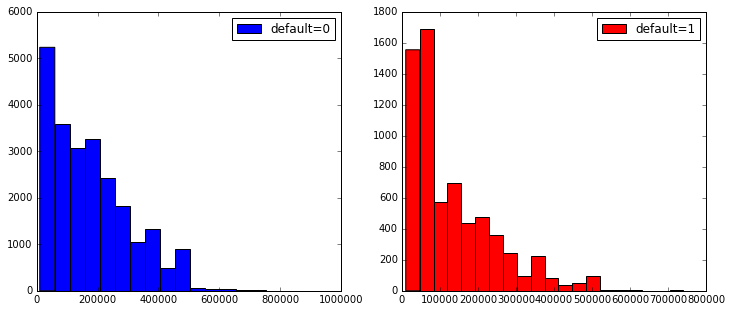

In [3]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(df[df.default == 0].LIMIT_BAL, bins = 20, color = 'b', label = 'default=0')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(df[df.default == 1].LIMIT_BAL, bins = 20, color = 'r', label = 'default=1')
pylab.legend()

pylab.show()

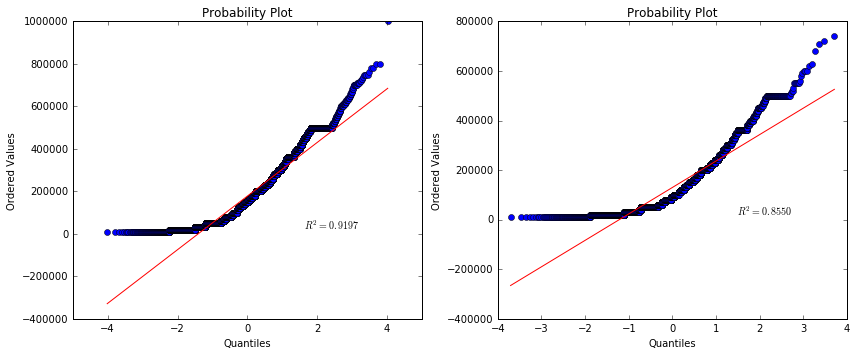

In [6]:
#ку ку графики
pylab.subplot(1,2,1)
scipy.stats.probplot(df[df.default == 0].LIMIT_BAL, plot = pyplot)

pylab.subplot(1,2,2)
scipy.stats.probplot(df[df.default == 1].LIMIT_BAL, plot = pyplot)
pylab.tight_layout()



Гипотеза:  медианы равны .Альтернатива - неравны

In [15]:

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [16]:
np.random.seed(0)

default0 = list(map(np.median, get_bootstrap_samples(data[data.default == 0].LIMIT_BAL.values, 1000)))
default1 = list(map(np.median, get_bootstrap_samples(data[data.default == 1].LIMIT_BAL.values, 1000)))
median_delta =list( map(lambda x: x[0] - x[1], zip(default0, default1)))

print ('Доверительный интервал для разности медиан лимитов :',stat_intervals(median_delta, 0.05))

('\xd0\x94\xd0\xbe\xd0\xb2\xd0\xb5\xd1\x80\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd1\x8b\xd0\xb9 \xd0\xb8\xd0\xbd\xd1\x82\xd0\xb5\xd1\x80\xd0\xb2\xd0\xb0\xd0\xbb \xd0\xb4\xd0\xbb\xd1\x8f \xd1\x80\xd0\xb0\xd0\xb7\xd0\xbd\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8 \xd0\xbc\xd0\xb5\xd0\xb4\xd0\xb8\xd0\xb0\xd0\xbd \xd0\xbb\xd0\xb8\xd0\xbc\xd0\xb8\xd1\x82\xd0\xbe\xd0\xb2 :', array([ 60000.,  70000.]))


Нулевая гипотеза  отклоняется,тк ноль не входит в доверительный интервал


Проверим на нормальность.(Тест Шапиро-Уилка)

In [17]:
from scipy import stats
print (stats.shapiro(data[data.default == 0].LIMIT_BAL))
print  (stats.shapiro(data[data.default == 1].LIMIT_BAL))

(0.9197262525558472, 0.0)
(0.8549829721450806, 0.0)


/home/egor/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


распределения не являются нормальными, проверим H0 о равенстве средних против двусторонней альтернативы, c помощью критерия Манна Уитни

In [18]:
from collections import namedtuple
MannwhitneyuResult = namedtuple('MannwhitneyuResult', ('statistic', 'pvalue'))
def tiecorrect(rankvals):
    arr = np.sort(rankvals)
    idx = np.nonzero(np.r_[True, arr[1:] != arr[:-1], True])[0]
    cnt = np.diff(idx).astype(np.float64)
    size = np.float64(arr.size)
    return 1.0 if size < 2 else 1.0 - (cnt**3 - cnt).sum() / (size**3 - size)

def mannwhitneyu(x, y, use_continuity=True, alternative=None):
    if alternative is None:
        warnings.warn("Calling `mannwhitneyu` without specifying "
                      "`alternative` is deprecated.", DeprecationWarning)

    x = np.asarray(x)
    y = np.asarray(y)
    n1 = len(x)
    n2 = len(y)
    ranked = scipy.stats.rankdata(np.concatenate((x, y)))
    rankx = ranked[0:n1]  # get the x-ranks
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
    u2 = n1*n2 - u1  # remainder is U for y
    T = tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in mannwhitneyu')
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)

    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    if alternative is None or alternative == 'two-sided':
        bigu = max(u1, u2)
    elif alternative == 'less':
        bigu = u1
    elif alternative == 'greater':
        bigu = u2
    else:
        raise ValueError("alternative should be None, 'less', 'greater' "
                         "or 'two-sided'")
    z = (bigu - meanrank) / sd
    if alternative is None:
        # This behavior, equal to half the size of the two-sided
        # p-value, is deprecated.
        p = scipy.stats.distributions.norm.sf(abs(z))
    elif alternative == 'two-sided':
        p = 2 * scipy.stats.distributions.norm.sf(abs(z))
    else:
        p = scipy.stats.distributions.norm.sf(z)
    u = u2
    # This behavior is deprecated.
    if alternative is None:
        u = min(u1, u2)
    return MannwhitneyuResult(u, p)

In [19]:
default0 = df[df['default']  == 0].LIMIT_BAL
default1 = df[df['default']  == 1].LIMIT_BAL

mannwhitneyu(data[data.default == 1].LIMIT_BAL, data[data.default == 0].LIMIT_BAL, alternative='two-sided')

MannwhitneyuResult(statistic=59257217.5, pvalue=1.2255485818223303e-189)

pvalue<0.05 H0 отвергаем <br>
Вывод : ненадежным клиентам банк выставляет более низкие лимиты

In [20]:
pt = data.pivot_table(index="SEX", 
     values="ID", columns="default", aggfunc = len, fill_value=0)
pt

default,0,1
SEX,,
1,9015,2873
2,14349,3763


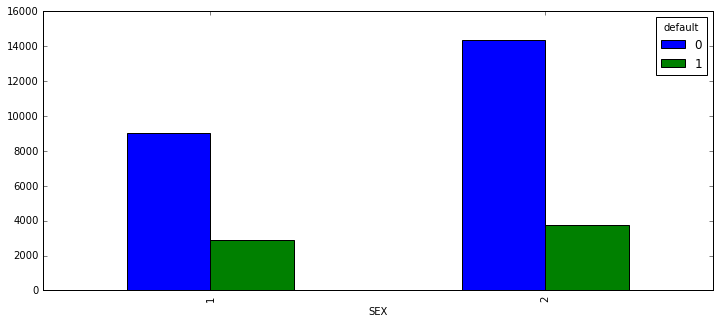

In [21]:
pt.plot(kind='bar', stacked=False)

In [22]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

Доверительный интервал для разности долей женщин, вернувших и не вернувших кредит:

In [23]:
proportions_confint_diff_ind(data[data.default == 0].SEX.values - 1, data[data.default == 1].SEX.values - 1, alpha = 0.05)

(0.033634932749628671, 0.060548077974896725)

H0: гендерный состав группы людей вернувших и не вернувших кредит не отличается <br>
H1: отличается

In [24]:
proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.default == 0].SEX.values-1 ,data[data.default == 1].SEX.values-1 ))

4.4728665216098307e-12

Вывод: H0 отклоняем

In [25]:
edu = data.pivot_table(columns = 'EDUCATION', index = 'default', values = 'ID', aggfunc = len, fill_value = 0)
edu

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


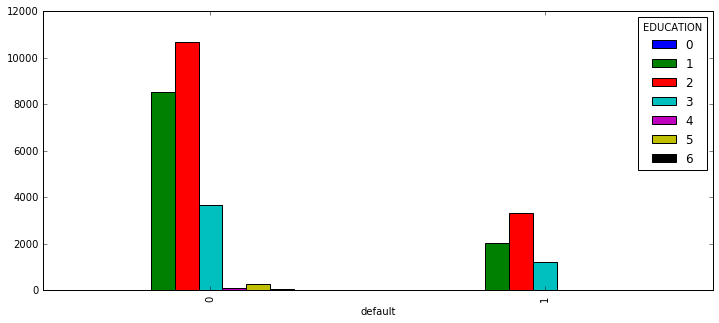

In [26]:
edu.plot(kind='bar', stacked=False)

H0: уровень образования не влияет на возврат 
Hi: влияет

In [27]:
stats.chi2_contingency(edu)[1]

1.2332626245415605e-32

Вывод: нулевую гипотезу отвергаем, образование влияет на возврат кредита

In [28]:
MARRIAGE = data.pivot_table(columns = 'MARRIAGE', index = 'default', values = 'ID', aggfunc = len, fill_value = 0)
MARRIAGE

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


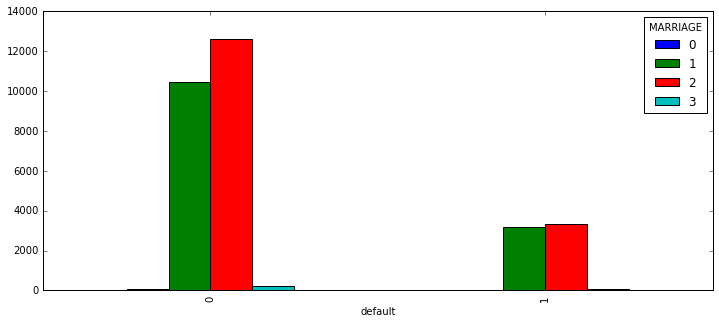

In [29]:
MARRIAGE.plot(kind='bar', stacked=False)

Критерий хи2 для корреляции Крамера: <br>
H0: семейный статус не влияет на default<br>
H1: семейный статус влияет на default

In [30]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(MARRIAGE.values)
chi2, p 

(35.662395834336088, 8.8258624575773752e-08)

Гипотеза H0 отклоняется на уровне значимости 0.05, семейный статус влияет на default

In [31]:
# коэф Крамера
n = MARRIAGE.sum(axis = 1).sum()
C_V = np.sqrt((chi2 / n)) 
print ('Cramer\'s V = ', C_V)

("Cramer's V = ", 0.034478203662766466)


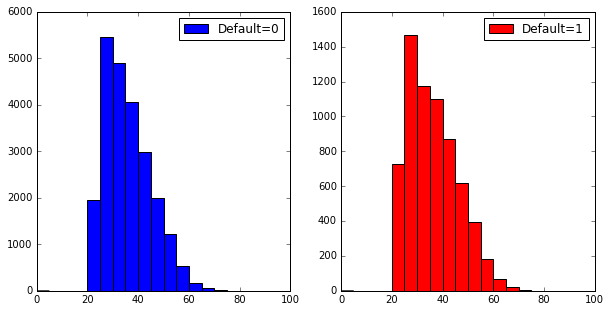

In [32]:
pylab.figure(figsize(10, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.default == 0].AGE, bins = 20, color = 'b', range = (0, 100), normed=False, label = 'Default=0')
pylab.legend()
pylab.subplot(1,2,2)
pylab.hist(data[data.default == 1].AGE, bins = 20, color = 'r', range = (0, 100), normed=False, label = 'Default=1')
pylab.legend()


H0: медианные значения возрастов в двух группах c (default = 0 и default = 1) равны <br>
H1:  не равны

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [33]:
AGE0 = data[data.default == 0].AGE.values
AGE1 = data[data.default == 1].AGE.values
median_age = list(zip(map(np.median, get_bootstrap_samples(AGE1, 1000)), map(np.median, get_bootstrap_samples(AGE0, 1000))))
print ("95% confidence interval for the difference between median for the Ages:", 
       stat_intervals(list(map(lambda x: x[1] - x[0], median_age)), 0.05))

('95% confidence interval for the difference between median for the Ages:', array([-1.,  0.]))


Вывод:H0 не отклоняется

С помощью Манна Уитни проверим равенства средних:

In [34]:
mannwhitneyu(AGE0, AGE1, alternative='two-sided')

MannwhitneyuResult(statistic=76966879.5, pvalue=0.37250354348986159)

Нулевая гипотеза о равенстве распределний средних не отклоняется.
На практике это значит то, что возраст можно игнорировать